# Accuracy

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [7]:
np.random.seed(123)
X = np.linspace(0, 10, 50)
y_true = np.sin(X) + 0.1 * X
y_noisy = y_true + np.random.normal(0, 0.5, size=X.shape)  # sd = 0.5

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y_noisy, test_size=0.2, random_state=42)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

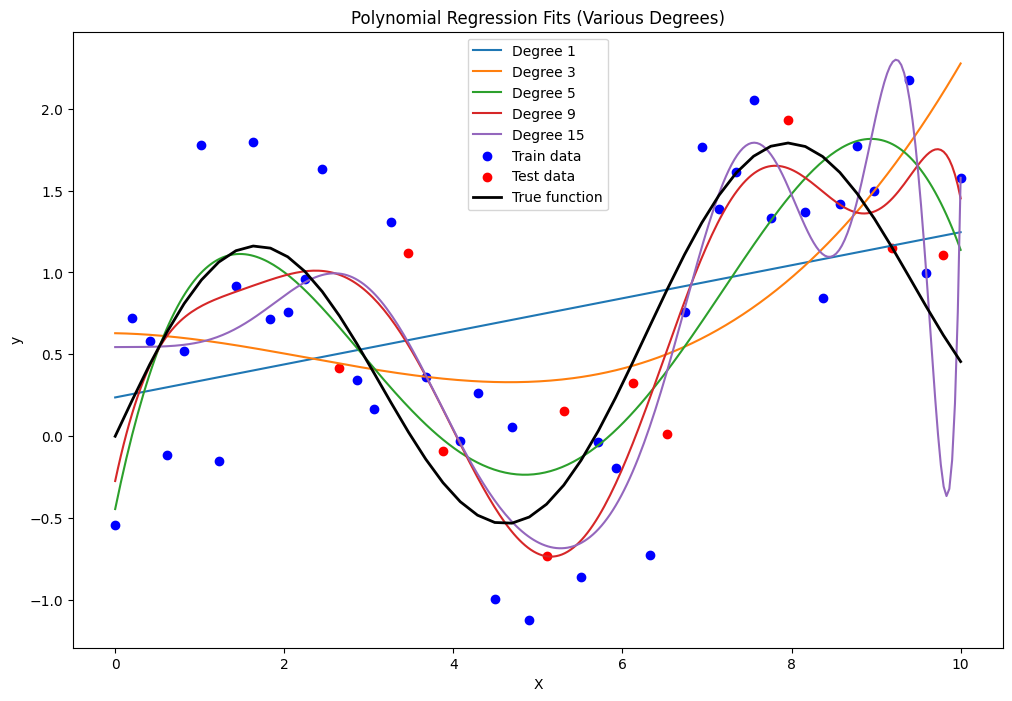

In [9]:

# Degrees to test
degrees = [1, 3, 5, 9, 15]

train_mse, test_mse = [], []

# --- 2. Fit Polynomial Models ---
plt.figure(figsize=(12, 8))
x_fit = np.linspace(0, 10, 300).reshape(-1, 1)

for deg in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=deg)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Fit model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    y_fit = model.predict(poly.transform(x_fit))
    
    # Compute errors
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    
    # Plot model fit
    plt.plot(x_fit, y_fit, label=f'Degree {deg}')

# Plot data and true function
plt.scatter(X_train, y_train, color='blue', label='Train data')
plt.scatter(X_test, y_test, color='red', label='Test data')
plt.plot(X, y_true, color='black', linewidth=2, label='True function')

plt.title('Polynomial Regression Fits (Various Degrees)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

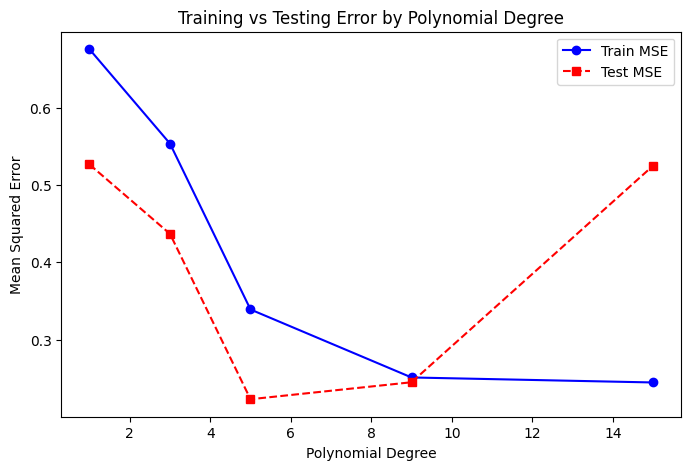

In [10]:
# --- 3. Visualization: Train vs Test Error ---
plt.figure(figsize=(8, 5))
plt.plot(degrees, train_mse, 'o-', label='Train MSE', color='blue')
plt.plot(degrees, test_mse, 's--', label='Test MSE', color='red')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Training vs Testing Error by Polynomial Degree')
plt.legend()
plt.show()


In [12]:
# --- 4. Print MSE Summary ---
print("Degree | Train MSE | Test MSE")
print("-------------------------------")
for deg, tr, te in zip(degrees, train_mse, test_mse):
    print(f"{deg:6d} | {tr:9.4f} | {te:8.4f}")


Degree | Train MSE | Test MSE
-------------------------------
     1 |    0.6758 |   0.5266
     3 |    0.5537 |   0.4369
     5 |    0.3390 |   0.2229
     9 |    0.2510 |   0.2448
    15 |    0.2446 |   0.5251
